Dataset 1:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset 2:
            Region         Date  Frequency   Estimated Un

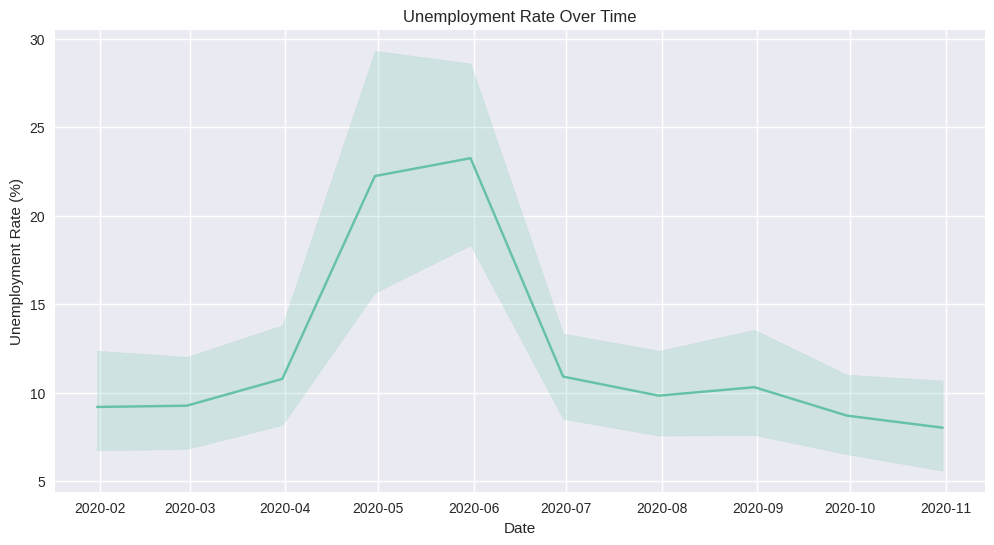

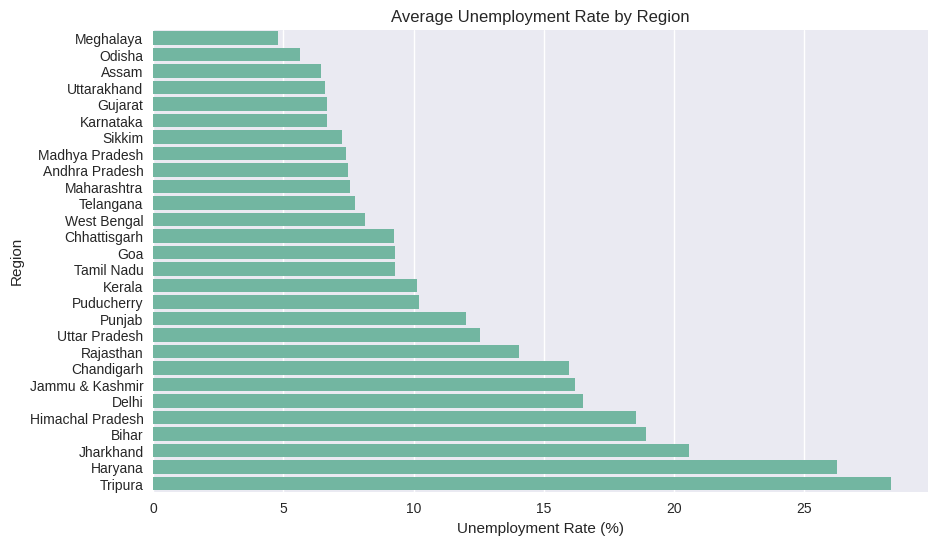

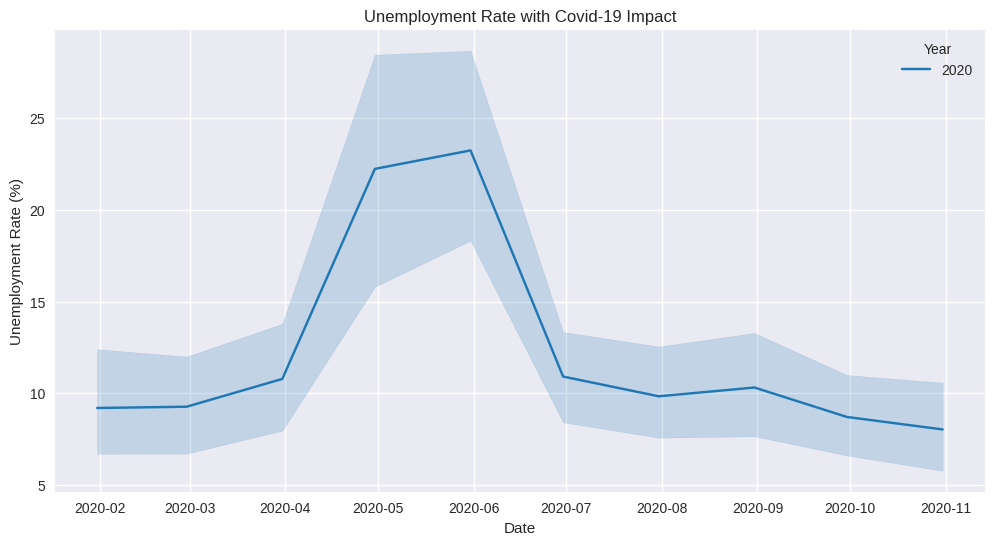

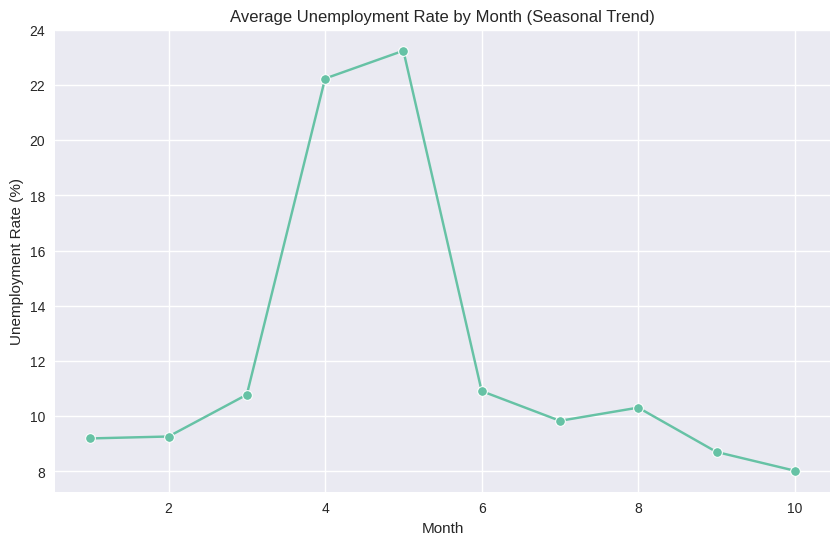

In [3]:
# unemployment_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv("/content/Unemployment in India.csv")
df2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

# Display first few rows
print("Dataset 1:\n", df1.head())
print("\nDataset 2:\n", df2.head())

# Data cleaning
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Convert date columns to datetime
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'].str.strip(), format='%d-%m-%Y')
if 'Date' in df2.columns:
    df2['Date'] = pd.to_datetime(df2['Date'].str.strip(), format='%d-%m-%Y')

# Basic info
print("\nDataset 1 Info:")
print(df1.info())
print("\nDataset 2 Info:")
print(df2.info())

# Basic statistics
print("\nDataset 1 Summary:\n", df1.describe())
print("\nDataset 2 Summary:\n", df2.describe())

# Visualization settings
plt.style.use('seaborn-v0_8') # Changed to a valid style
sns.set_palette("Set2")

# Trend over time (from df2)
if 'Date' in df2.columns and 'Estimated Unemployment Rate (%)' in df2.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)')
    plt.title("Unemployment Rate Over Time")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid(True)
    plt.show()

# Region-wise average unemployment (from df1 if available)
if 'Region' in df1.columns and 'Estimated Unemployment Rate (%)' in df1.columns:
    plt.figure(figsize=(10, 6))
    region_avg = df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
    sns.barplot(x=region_avg.values, y=region_avg.index)
    plt.title("Average Unemployment Rate by Region")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Region")
    plt.show()

# Impact of Covid-19 (highlight 2020 in df2)
if 'Date' in df2.columns and 'Estimated Unemployment Rate (%)' in df2.columns:
    df2['Year'] = df2['Date'].dt.year
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)', hue='Year', palette='tab10')
    plt.title("Unemployment Rate with Covid-19 Impact")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.legend(title="Year")
    plt.show()

# Seasonal trends (monthly average)
if 'Date' in df2.columns and 'Estimated Unemployment Rate (%)' in df2.columns:
    df2['Month'] = df2['Date'].dt.month
    monthly_avg = df2.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
    plt.title("Average Unemployment Rate by Month (Seasonal Trend)")
    plt.xlabel("Month")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid(True)
    plt.show()